#Connect to Google Drive

In [ ]:
#Connect to google drive
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/ProjectOutput/TimeRecord/

/content/gdrive/MyDrive/ProjectOutput/TimeRecord


#Prepare Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset_names = ['pictBirds', 'pictFlowers', 'pictButterflies', 'myBirds', 'myFlowers', 'myButterflies']
nn_names = ['TF', 'AFJ', 'PyT']
time_records = {}

for dataset_name in dataset_names:
  for nn_name in nn_names:
    time_record_data = np.load(dataset_name + '_' + nn_name + '_TimeDiffRecord.npy')
    time_records[dataset_name + '_' + nn_name] = time_record_data

#Show Record

In [ ]:
for dataset_name in dataset_names:
  print(dataset_name + ':')
  for nn_name in nn_names:
    print(nn_name + ':\t', end='')
    for x in time_records[dataset_name + '_' + nn_name]:
      print('%3d minutes %3d seconds' %(x[0], x[1]), end='\t')
    print('')
  print('')

pictBirds:
TF:	  2 minutes  34 seconds	  5 minutes  12 seconds	  7 minutes  49 seconds	 10 minutes  27 seconds	
AFJ:	  7 minutes  20 seconds	 14 minutes  39 seconds	 21 minutes  58 seconds	 29 minutes  16 seconds	
PyT:	 12 minutes  18 seconds	 25 minutes  58 seconds	 40 minutes  50 seconds	 57 minutes  27 seconds	

pictFlowers:
TF:	  2 minutes  28 seconds	  4 minutes  59 seconds	  7 minutes  31 seconds	 10 minutes   2 seconds	
AFJ:	  7 minutes  10 seconds	 14 minutes  33 seconds	 21 minutes  55 seconds	 29 minutes  16 seconds	
PyT:	 12 minutes  39 seconds	 26 minutes  27 seconds	 41 minutes  35 seconds	 58 minutes  24 seconds	

pictButterflies:
TF:	  3 minutes   3 seconds	  6 minutes  10 seconds	  9 minutes  17 seconds	 12 minutes  24 seconds	
AFJ:	  7 minutes  18 seconds	 14 minutes  42 seconds	 22 minutes   4 seconds	 29 minutes  27 seconds	
PyT:	 20 minutes  33 seconds	 42 minutes  35 seconds	 66 minutes  33 seconds	 91 minutes  47 seconds	

myBirds:
TF:	  3 minutes   5 seconds	  6 

#Calculate Time
normalize 60 seconds into 1.0

In [ ]:
time_record_cal = {}

for dataset_name in dataset_names:
  for nn_name in nn_names:
    time_record_cal[dataset_name + '_' + nn_name] = []
    for x in time_records[dataset_name + '_' + nn_name]:
      time_cal = x[0] + x[1]/60
      time_record_cal[dataset_name + '_' + nn_name].append(time_cal)
    print(time_record_cal[dataset_name + '_' + nn_name])

[2.5666666666666664, 5.2, 7.816666666666666, 10.45]
[7.333333333333333, 14.65, 21.966666666666665, 29.266666666666666]
[12.3, 25.966666666666665, 40.833333333333336, 57.45]
[2.466666666666667, 4.983333333333333, 7.516666666666667, 10.033333333333333]
[7.166666666666667, 14.55, 21.916666666666668, 29.266666666666666]
[12.65, 26.45, 41.583333333333336, 58.4]
[3.05, 6.166666666666667, 9.283333333333333, 12.4]
[7.3, 14.7, 22.066666666666666, 29.45]
[20.55, 42.583333333333336, 66.55, 91.78333333333333]
[3.0833333333333335, 6.216666666666667, 9.366666666666667, 12.5]
[7.4, 14.866666666666667, 22.316666666666666, 29.75]
[17.266666666666666, 36.15, 56.5, 78.21666666666667]
[5.483333333333333, 11.0, 16.533333333333335, 22.05]
[7.183333333333334, 14.533333333333333, 22.0, 29.35]
[26.416666666666668, 55.88333333333333, 88.0, 122.73333333333333]
[5.45, 10.966666666666667, 16.466666666666665, 21.966666666666665]
[8.0, 16.016666666666666, 24.033333333333335, 32.06666666666667]
[20.416666666666668, 4

#Plot Graph

Text(0.5, 0.98, 'Dataset')

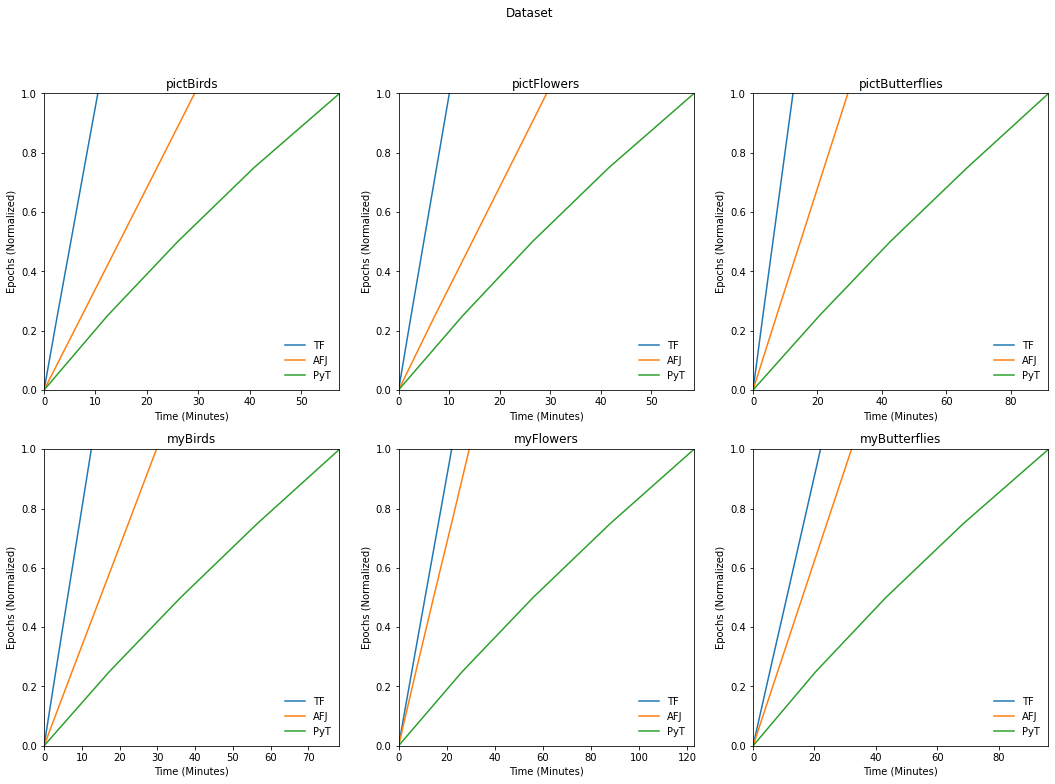

In [ ]:
#Graph for each dataset
fig = plt.figure(figsize=(18, 12))

y3 = [0, 0.25, 0.5, 0.75, 1]
i = 1

for dataset_name in dataset_names:
  plt.subplot(2, 3, i)
  maxTime = []
  for nn_name in nn_names:
    plt.plot([0]+time_record_cal[dataset_name + '_' + nn_name], y3, label=nn_name)
    maxTime = maxTime + time_record_cal[dataset_name + '_' + nn_name]
  maxTime = max(maxTime)
  plt.axis([0, maxTime, 0, 1])
  plt.title(dataset_name)
  plt.legend(frameon=False)
  plt.xlabel('Time (Minutes)')
  plt.ylabel('Epochs (Normalized)')
  i = i + 1

plt.suptitle('Dataset')

Text(0.5, 0.98, 'GAN')

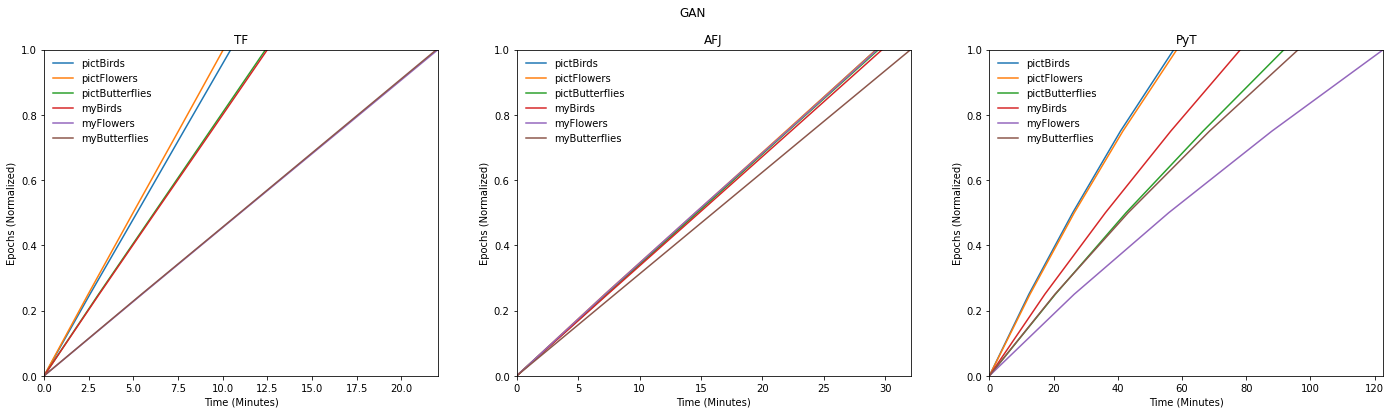

In [ ]:
#Graph for each Neural Networks
fig = plt.figure(figsize=(24, 6))

y3 = [0, 0.25, 0.5, 0.75, 1]
i = 1

for nn_name in nn_names:
  plt.subplot(1, 3, i)
  maxTime = []
  for dataset_name in dataset_names:
    plt.plot([0]+time_record_cal[dataset_name + '_' + nn_name], y3, label=dataset_name)
    maxTime = maxTime + time_record_cal[dataset_name + '_' + nn_name]
  maxTime = max(maxTime)
  plt.axis([0, maxTime, 0, 1])
  plt.title(nn_name)
  plt.legend(frameon=False)
  plt.xlabel('Time (Minutes)')
  plt.ylabel('Epochs (Normalized)')
  i = i + 1

plt.suptitle('GAN')

In [ ]:
#pictBirds
xTF_1 = [22,42,62,83]
xAF_1 = [40,81,120,161]
xPT_1 = [16,32,51,71]

#pictFlowers
xTF_2 = [21,42,64,85]
xAF_2 = [41,78,115,158]
xPT_2 = [22,46,72,100]

#pictButterflies
xTF_3 = [42,84,102,118]
xAF_3 = [43,86,128,171]
xPT_3 = [38,80,129,181]

#myBirds
xTF_4 = [4,8,11,15]
xAF_4 = [40,80,120,160]
xPT_4 = [17,36,58,80]

#myFlowers
xTF_5 = [4,8,12,16]
xAF_5 = [40,80,119,160]
xPT_5 = [19,42,68,97]

#myButterflies
xTF_6 = [4,8,12,16]
xAF_6 = [45,87,130,172]
xPT_6 = [20,43,69,97]

y1 = [1,2500,5000,7500,10000]
y2 = [1,125,250,375,500]

Text(0.5, 0.98, 'GAN')

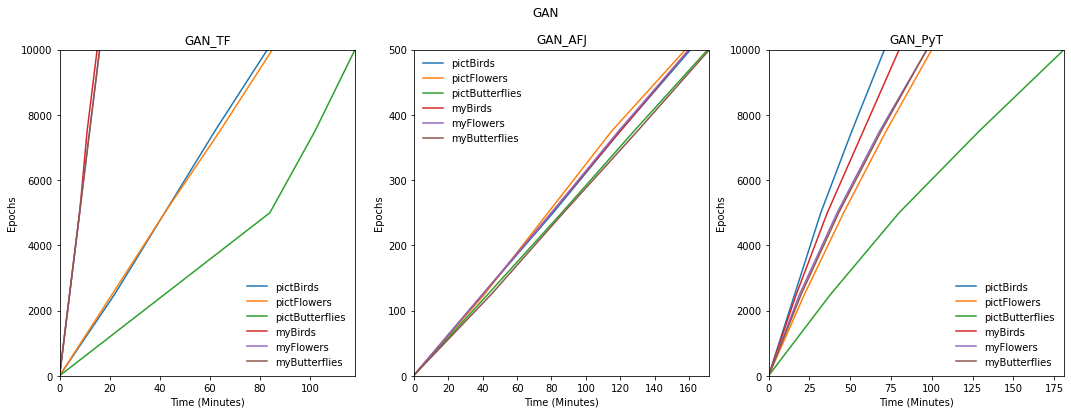

In [ ]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot([0]+xTF_1, y1, label='pictBirds')
plt.plot([0]+xTF_2, y1, label='pictFlowers')
plt.plot([0]+xTF_3, y1, label='pictButterflies')
plt.plot([0]+xTF_4, y1, label='myBirds')
plt.plot([0]+xTF_5, y1, label='myFlowers')
plt.plot([0]+xTF_6, y1, label='myButterflies')
maxTime = max(xTF_1 + xTF_2 + xTF_3 + xTF_4 + xTF_5 + xTF_6)
plt.axis([0, maxTime, 0, 10000])
plt.title('GAN_TF')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs')

plt.subplot(1, 3, 2)
plt.plot([0]+xAF_1, y2, label='pictBirds')
plt.plot([0]+xAF_2, y2, label='pictFlowers')
plt.plot([0]+xAF_3, y2, label='pictButterflies')
plt.plot([0]+xAF_4, y2, label='myBirds')
plt.plot([0]+xAF_5, y2, label='myFlowers')
plt.plot([0]+xAF_6, y2, label='myButterflies')
maxTime = max(xAF_1 + xAF_2 + xAF_3 + xAF_4 + xAF_5 + xAF_6)
plt.axis([0, maxTime, 0, 500])
plt.title('GAN_AFJ')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs')

plt.subplot(1, 3, 3)
plt.plot([0]+xPT_1, y1, label='pictBirds')
plt.plot([0]+xPT_2, y1, label='pictFlowers')
plt.plot([0]+xPT_3, y1, label='pictButterflies')
plt.plot([0]+xPT_4, y1, label='myBirds')
plt.plot([0]+xPT_5, y1, label='myFlowers')
plt.plot([0]+xPT_6, y1, label='myButterflies')
maxTime = max(xPT_1 + xPT_2 + xPT_3 + xPT_4 + xPT_5 + xPT_6)
plt.axis([0, maxTime, 0, 10000])
plt.title('GAN_PyT')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs')

plt.suptitle('GAN')

Text(0.5, 0.98, 'Dataset')

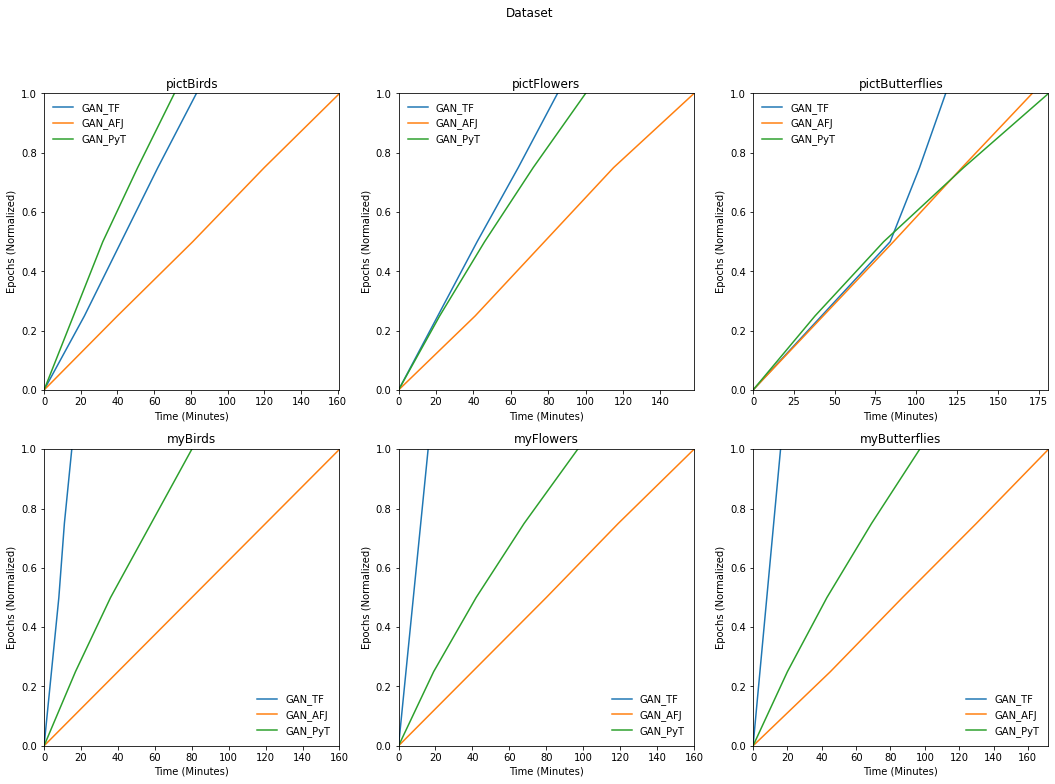

In [ ]:
fig = plt.figure(figsize=(18, 12))

y3 = [0, 0.25, 0.5, 0.75, 1]

plt.subplot(2, 3, 1)
plt.plot([0]+xTF_1, y3, label='GAN_TF')
plt.plot([0]+xAF_1, y3, label='GAN_AFJ')
plt.plot([0]+xPT_1, y3, label='GAN_PyT')
maxTime = max(xTF_1 + xAF_1 + xPT_1)
plt.axis([0, maxTime, 0, 1])
plt.title('pictBirds')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.subplot(2, 3, 2)
plt.plot([0]+xTF_2, y3, label='GAN_TF')
plt.plot([0]+xAF_2, y3, label='GAN_AFJ')
plt.plot([0]+xPT_2, y3, label='GAN_PyT')
maxTime = max(xTF_2 + xAF_2 + xPT_2)
plt.axis([0, maxTime, 0, 1])
plt.title('pictFlowers')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.subplot(2, 3, 3)
plt.plot([0]+xTF_3, y3, label='GAN_TF')
plt.plot([0]+xAF_3, y3, label='GAN_AFJ')
plt.plot([0]+xPT_3, y3, label='GAN_PyT')
maxTime = max(xTF_3 + xAF_3 + xPT_3)
plt.axis([0, maxTime, 0, 1])
plt.title('pictButterflies')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.subplot(2, 3, 4)
plt.plot([0]+xTF_4, y3, label='GAN_TF')
plt.plot([0]+xAF_4, y3, label='GAN_AFJ')
plt.plot([0]+xPT_4, y3, label='GAN_PyT')
maxTime = max(xTF_4 + xAF_4 + xPT_4)
plt.axis([0, maxTime, 0, 1])
plt.title('myBirds')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.subplot(2, 3, 5)
plt.plot([0]+xTF_5, y3, label='GAN_TF')
plt.plot([0]+xAF_5, y3, label='GAN_AFJ')
plt.plot([0]+xPT_5, y3, label='GAN_PyT')
maxTime = max(xTF_5 + xAF_5 + xPT_5)
plt.axis([0, maxTime, 0, 1])
plt.title('myFlowers')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.subplot(2, 3, 6)
plt.plot([0]+xTF_6, y3, label='GAN_TF')
plt.plot([0]+xAF_6, y3, label='GAN_AFJ')
plt.plot([0]+xPT_6, y3, label='GAN_PyT')
maxTime = max(xTF_6 + xAF_6 + xPT_6)
plt.axis([0, maxTime, 0, 1])
plt.title('myButterflies')
plt.legend(frameon=False)
plt.xlabel('Time (Minutes)')
plt.ylabel('Epochs (Normalized)')

plt.suptitle('Dataset')